# AM6020 Assignment 1

## Submission

This assignment must be **your own work**. Remember the Plagarism Policy that you agreed to (near the top of the AM6020 Modules page on Canvas).

Please submit your assignment electronically:
- Save the notebook (*studentID*_A1.ipynb).
- Upload the notebook to the Assignment 1 submission on Canvas.

**If you submit this assignment in late or to the wrong location, a mark of zero will be recorded unless you make a case for mitigation by submitting supporting documentation (e.g. medical certificates) to the School of Mathematical Sciences Office <sms@ucc.ie>.**


*Note: When solving the tasks below, you can look up further methods and functions, not necessarily covered in the AM6020 lectures, but only methods and functions from the standard library or those modules we covered. In other words, for this assignment you should only ever import math, random, NumPy and/or Matplotlib.*

## Part 1: Vigenère cipher (12 marks)

There are older forms of encryption that we can easily decrypt using personal computers. The [Vigenère cipher](https://en.wikipedia.org/wiki/Vigen%C3%A8re_cipher) was used throughout medieval times and during the American civil war. It requires the use of a "key word" to encrypt a message using the Vigenère table.

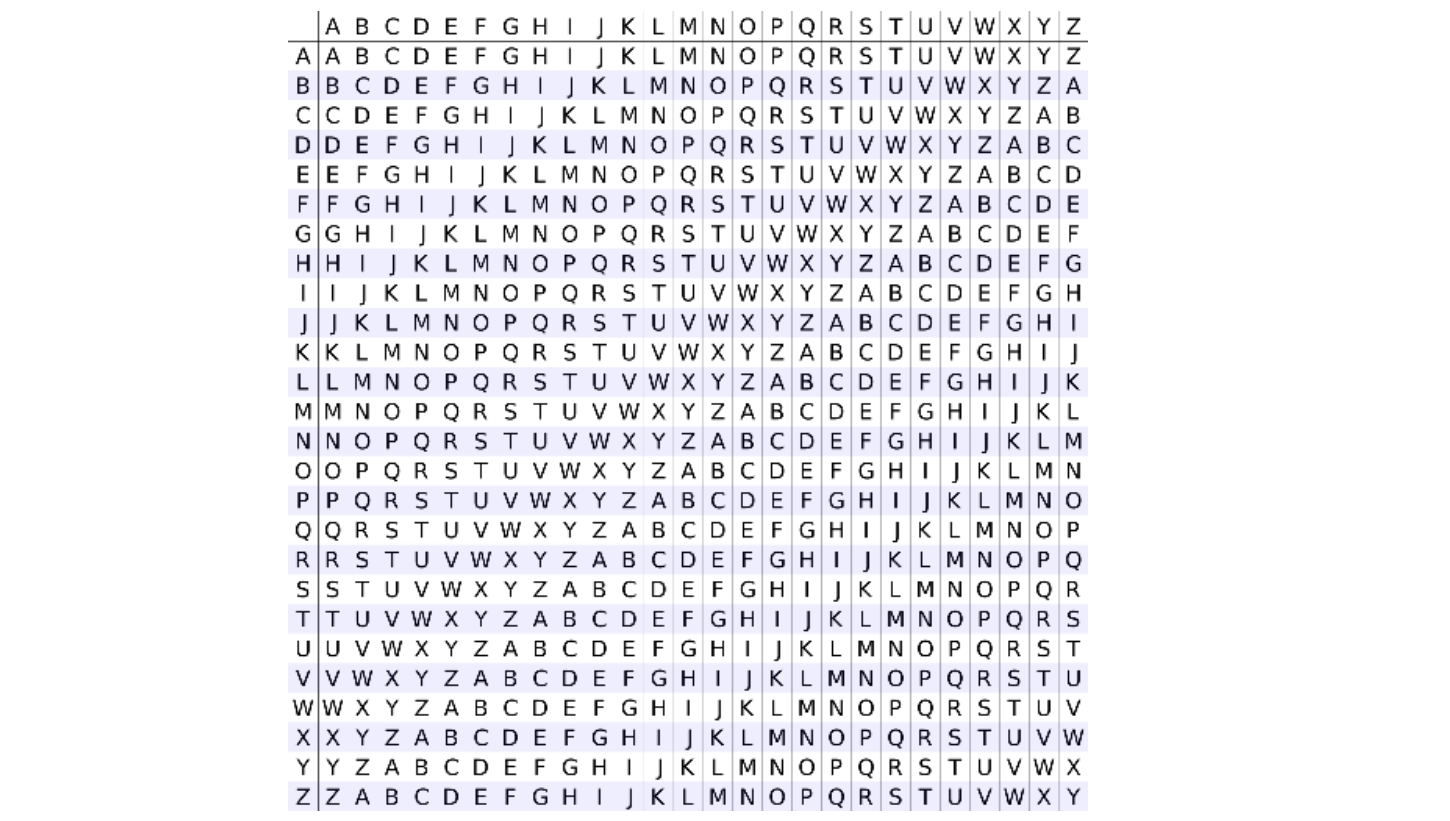

For example, say the key word is CODE and the message is PYTHON. 

- To encode the first letter "P" you use the row labelled "C" (i.e. the first letter of the key word) on the left-hand-side of the table. So "P" becomes "R".
- To encode the second letter "Y" you use the row labelled "O" (i.e. this is the second letter of the key word). So  "Y" becomes "M".
- For the third letter "T" you use the row labelled "D" (i.e. the third letter in CODE). "T" becomes "W".
- Now using the row labelled "E", the letter "H" becomes "L".
- After using all the letters of the key word, you go back to the first letter again. So using the row labelled "C" again, the letter "O" becomes "Q".
- Finally, using the row labelled "O", the letter "N" becomes "B".

So in this example the encryted message is RMWLQB. If you did not have the key word, decrypting this message may take a very long time. Of course, Vigenère ciphers are not so effective these days because you can simply use a computer to efficiently try possible key words.

Your task is to demonstrate this fact by decrypting the following message, which has been encrypted by a Vigenère cipher:

      unqhjltyseqiaweegsbusxtetagkjmbeqrqiqamenumaqrqidopujsnnmrqhzdqtaltzeelegnmpxxysgfyfjauvgtqaioqtunnaqsqhpdqlsgqhzdqcmnbsxaqhzdqiqamegnmpxxvvybbuqdqpzxteyewpgmqiaweeihbzwxysaukeepbjqsqimkbusxlvpaqhzdqzmlmegnmpxxvvybbuqdqdutaefhxeyiqldxhujlhdjgkhputsxyqhpdqkdyqpzgklpixufsqaaxplfxbusrxkuegaextzjwxsxxtzjfklehqnunzldxtupxhymnzljzxzfxnufieeponntxcbetqjamxzjthnqtaldxwphiwljdhbshqpzxahxfqhzdqjdetaqxmdaxwpecleirtwjetjtxbujpehetbjjwkhbxtupxvouleegnmpxxypdmqhnonajtpvjthefhklqxavgrlebrxoqameavxujtheanxetugkdewemnweqizofyqhzdqsunxefwhexaknqxuhwignjsalqtleiimojptyohflztqwmpxyjpehoeqvzeqkusveafqkauzojogemxepshmskxysauklpxlbdftjqxtupxkvxlqbztbsjhtsrxteoegaumxadeqativrjcnajonajgbusekidetkjfbngrxzjwbatxteeeolzxvlztbtqtkljwbkqxvbftxyjagkjtkhzsyldxmvjbtrunzeehxlfsqimkxegnmpxxlsugaaxyqwgfylpxtupxllfxgpzeqaaxmlzxfpzumlexwlbegkunzeanqateqzuzxeafqfaukeoohrueqjgtmldsqsqtqjaoeeanqimkbusxloqemzjfhyjfbcqxfpzumlexulrokljtkhzsyldrbusxmvjaqjaoepzgqymcdefoqjaoeeoofwxemlxy


You do not know the exact message, but you do know that it is a delicious recipe for gingerbread. So the message will contain the word `gingerbread`. You also know that the key word contains **four letters**.

Print the decrypted message and, also, the key word.

*Hint: Compare the command `"findsomethinginastring".find("something")` with `"findsomethinginastring".find("nowhere")`.* That might be useful.

*Reminder: Depending on your approach you may need to make a copy of, for example, a list. In Python, you must use `copied_version=original[:]`. If you simply type `copied_version=original`, you will not be making another copy, but rather a reference that points to the original.*

# Vigenère cipher: Method 1

## Brute Force Method of Trying All Possible 4 Letter Key Combinations

In [6]:
# Write your code here. Insert more cells as needed.
%matplotlib inline
import matplotlib.pyplot as plt
import math

# METHOD 1 - BRUTE FORCE METHOD OF TRYING ALL POSSIBLE 4 LETTER KEYS

# each letter of the alphabet will have an index 0-25

alphabet = "abcdefghijklmnopqrstuvwxyz"

# get all possible 4 letter codes and append to a list
possible_keys = []

for letter1 in alphabet:
    for letter2 in alphabet:
        for letter3 in alphabet:
            for letter4 in alphabet:
                key = letter1 + letter2 + letter3 + letter4
                possible_keys.append(key)
                
                
# len(possible_keys)

# brute force the combinations until you translate gingerbread 

# function for decrypting
# takes the encrypted message and the specified key as inputs 

def decrypter(encryption, key):

    alphabet = "abcdefghijklmnopqrstuvwxyz"
    decryption = ''
    # empty string for which each decrypted letter will be added - end result will be full decryption
    
    encryption = encryption.lower() 
    key = key.lower()
    # makes sure encrypted code is lower case to match alphabet, 
    # even if user typed in upper case for encryption
    
    # end position - position of each letter in key within the alphabet
    # this position will be taken away from the corresponding encrypted letter position (start_pos)
    end_pos = []
    for letter in range(0, len(key)):
        end = alphabet.index(key[letter])
        end_pos.append(end)
    
    # start position - position of each letter in encrypted code within the alphabet
    # the corresponding key letter index will be taken away from this encrypted letter position (start_pos)
    start_pos = []
    for code in range(0, len(encryption)):
        start = alphabet.index(encryption[code])
        start_pos.append(start)
    
    # result is a list of key letter indexes and a list of encrypted letter indexes within the alphabet 
    
    # the list of key letter indexes must repeat for the length of the encrypted code letter index list (start_point)
    # in order to decipher it fully
    
    # mulitply the list by the length of encryption - just so its definitely long enough 
    end_pos = end_pos*len(encryption)   
    
    # then shorten to the exact length of the encrypted code letter index list 
    end_pos = end_pos[0:len(start_pos)] 

    # repeat for each letter in start indexes 
    for i in range(0, len(start_pos)):
        
        # to calculate the actual decrypted letter
        # it is encrypted letter index - specific associated key letter index modulo 26 (to ensure it is within alphabet range)
        calculation = start_pos[i] - end_pos[i] % 26
        
        # append each translated letter to the decryption string    
        translation = alphabet[calculation]
        decryption += translation
    
    # return full decrypted message
    return decryption


# TEST OUT POSSIBLE KEYS - answer is correct if gingerbread within

# encrypted message
encryption = "unqhjltyseqiaweegsbusxtetagkjmbeqrqiqamenumaqrqidopujsnnmrqhzdqtaltzeelegnmpxxysgfyfjauvgtqaioqtunnaqsqhpdqlsgqhzdqcmnbsxaqhzdqiqamegnmpxxvvybbuqdqpzxteyewpgmqiaweeihbzwxysaukeepbjqsqimkbusxlvpaqhzdqzmlmegnmpxxvvybbuqdqdutaefhxeyiqldxhujlhdjgkhputsxyqhpdqkdyqpzgklpixufsqaaxplfxbusrxkuegaextzjwxsxxtzjfklehqnunzldxtupxhymnzljzxzfxnufieeponntxcbetqjamxzjthnqtaldxwphiwljdhbshqpzxahxfqhzdqjdetaqxmdaxwpecleirtwjetjtxbujpehetbjjwkhbxtupxvouleegnmpxxypdmqhnonajtpvjthefhklqxavgrlebrxoqameavxujtheanxetugkdewemnweqizofyqhzdqsunxefwhexaknqxuhwignjsalqtleiimojptyohflztqwmpxyjpehoeqvzeqkusveafqkauzojogemxepshmskxysauklpxlbdftjqxtupxkvxlqbztbsjhtsrxteoegaumxadeqativrjcnajonajgbusekidetkjfbngrxzjwbatxteeeolzxvlztbtqtkljwbkqxvbftxyjagkjtkhzsyldxmvjbtrunzeehxlfsqimkxegnmpxxlsugaaxyqwgfylpxtupxllfxgpzeqaaxmlzxfpzumlexwlbegkunzeanqateqzuzxeafqfaukeoohrueqjgtmldsqsqtqjaoeeanqimkbusxloqemzjfhyjfbcqxfpzumlexulrokljtkhzsyldrbusxmvjaqjaoepzgqymcdefoqjaoeeoofwxemlxy"

# for each possible key
for key in possible_keys:
    decryption = decrypter(encryption, key)      # use decryopter function with encrypted code and selected key
    if decryption.find("gingerbread") != -1:     # if the resulting decryption does not not find (so it does contain) 'gingerbread'
        print("The key to the cipher is: " + key) # print the decrypted message and the key that worked
        print(decryption)
        
# Note: this for loop will take a bit of time as there are over 450,000 possible keys to try!
# len(possible_keys)

The key to the cipher is: math
inxaxlargexbowlxusingxaxhandxmixerxbeatxbutterxbrownxsugarxandxmolassesxuntilxfluffyxaboutxtwoxminutesxaddxeggxandxvanillaxandxbeatxuntilxcombinedxinxaxmediumxbowlxwhiskxflourxspicesxbakingxsodaxandxsaltxuntilxcombinedxwithxthexmixerxonxlowxgraduallyxaddxdryxingredientsxtoxwetxingredientsxasxwellxasxfreshxgingerxandxorangexzestxuntilxdoughxjustxcomesxtogetherxdividexdoughxinxhalfxandxcreatextwoxdiscsxwrapxeachxinxplasticxwrapxandxchillxuntilxfirmxaboutxtwoxtoxthreexhoursxpreheatxovenxtoxonexhundredxandxeightyxandxlinextwoxlargexbakingxsheetsxwithxparchmentxpaperxplacexonexdiscxofxdoughxonxaxlightlyxflouredxsurfacexandxrollxuntilxhalfxaxcentimetrexthickxcutxoutxgingerbreadxfiguresxwithxaxsevenxcentimetrexwidexcutterxandxtransferxtoxbakingxsheetsxbakexuntilxslightlyxpuffedxandxsetxninextoxtenxminutesxdependingxonxthexsizexofxyourxcookiexcuttersxletxcoolxonxbakingxsheetsxforxfivexminutesxbeforextransferringxtoxaxcoolingxrackxtoxcoolxcompletely


# Vigenère cipher: Method 2
## Brute Force But Reducing No. of Possible 4 Letter Key Combinations Using Frequency Analysis 

In [2]:
# METHOD 2 - BRUTE FORCE BUT TRY TO REDUCE POSSIBLE 4 LETTER KEY COMBINATIONS 

# calculated frequencies of each letter in the English alphabet 
# from http://cs.wellesley.edu/~fturbak/codman/letterfreq.html (Cryptographical Mathematics, by Robert Edward Lewand)
# make into a dictionary, each letter and their associated freqs

alpha_freq = {
    "a":0.08167,
    "b":0.01492,
    "c":0.02782,
    "d":0.04253,
    "e":0.12702,
    "f":0.02228,
    "g":0.02015,
    "h":0.06094,
    "i":0.06966,
    "j":0.00153,
    "k":0.00772,
    "l":0.04025,
    "m":0.02406,
    "n":0.06749,
    "o":0.07507,
    "p":0.01929,
    "q":0.00095,
    "r":0.05987,
    "s":0.06327,
    "t":0.09056,
    "u":0.02758,
    "v":0.00978,
    "w":0.02360,
    "x":0.00150,
    "y":0.01974,
    "z":0.000747
}

print(alpha_freq)

# can access dict key value using alphabet indexing
# example - alpha_freq[alphabet[0]]
# alphabet.index('t')

{'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253, 'e': 0.12702, 'f': 0.02228, 'g': 0.02015, 'h': 0.06094, 'i': 0.06966, 'j': 0.00153, 'k': 0.00772, 'l': 0.04025, 'm': 0.02406, 'n': 0.06749, 'o': 0.07507, 'p': 0.01929, 'q': 0.00095, 'r': 0.05987, 's': 0.06327, 't': 0.09056, 'u': 0.02758, 'v': 0.00978, 'w': 0.0236, 'x': 0.0015, 'y': 0.01974, 'z': 0.000747}


In [3]:
### KEY IS 4 LETTERS LONG ###
# Need freq of every 4th counted letter in the encrypted code (starting at 0)
# ie RMWLQBLWECLP - *0*,1,2,3,*4*,5,6,7,*8*,9,10,11
# get freq of R, Q, E 

def encrypted_freq(encrypted_code, key_length, start_point): 
    # variables - encrypted message, length of key (this is known) 
    # starting point from where to begin calcualting every 4th letter frequency
    
    encrypt_freq = {}            # creating empty dictionary to add the associated frequencies of each letter 
    total = len(encrypted_code)  # total number of letters in the encrypted message
    encryptf_sort = {}           # creating empty dictionary to add the sorted frequency values
    every4_string = ''           # empty string to add each 4th letter to, allows the calculation of frequency of each in encrypted code

    # for in the range start point(e.g. 0), 954, 4....will mean counting every letter at every 4th position starting at 0
    # next start point should be 1, then 2, then 3 to get all relative frequencies
    for i in range(start_point, len(encrypted_code), key_length): 
        every4_string += encrypted_code[i]   
        encrypt_freq[encrypted_code[i]] = every4_string.count(encrypted_code[i])/total
    
        # add the i'th element of the encrypted code e.g. 'u' to the empty dictionary
        # assign the value of this element ('u') to to its calculated frequency in the encrypted code
        # freq:
        # counting number of times this element appears in the code (this is made easy by adding each letter to the string)
        # divided by total letter count
     
    # sort the encrypted frequencies dictionary 
    # makes a list out of the dictioanry items - want a dictionary though
    encrypt_order = sorted(encrypt_freq.items())
    
    # so add each dicitoanry key and value within this sorted list to new encrypted frequencys sorted dictionary 
    for i in range(0,len(encrypt_order)):
        encryptf_sort[encrypt_order[i][0]] = encrypt_order[i][1]

    
    # return the encrypted frequencies dictionary - contains the frequency of every 4th letter (starting from specified point)
    # returns the sorted encryoted frequency dictionary, useful for later
    return (encrypt_freq, encryptf_sort)
        

### Run the code ###

# encrypted message
encryption = "unqhjltyseqiaweegsbusxtetagkjmbeqrqiqamenumaqrqidopujsnnmrqhzdqtaltzeelegnmpxxysgfyfjauvgtqaioqtunnaqsqhpdqlsgqhzdqcmnbsxaqhzdqiqamegnmpxxvvybbuqdqpzxteyewpgmqiaweeihbzwxysaukeepbjqsqimkbusxlvpaqhzdqzmlmegnmpxxvvybbuqdqdutaefhxeyiqldxhujlhdjgkhputsxyqhpdqkdyqpzgklpixufsqaaxplfxbusrxkuegaextzjwxsxxtzjfklehqnunzldxtupxhymnzljzxzfxnufieeponntxcbetqjamxzjthnqtaldxwphiwljdhbshqpzxahxfqhzdqjdetaqxmdaxwpecleirtwjetjtxbujpehetbjjwkhbxtupxvouleegnmpxxypdmqhnonajtpvjthefhklqxavgrlebrxoqameavxujtheanxetugkdewemnweqizofyqhzdqsunxefwhexaknqxuhwignjsalqtleiimojptyohflztqwmpxyjpehoeqvzeqkusveafqkauzojogemxepshmskxysauklpxlbdftjqxtupxkvxlqbztbsjhtsrxteoegaumxadeqativrjcnajonajgbusekidetkjfbngrxzjwbatxteeeolzxvlztbtqtkljwbkqxvbftxyjagkjtkhzsyldxmvjbtrunzeehxlfsqimkxegnmpxxlsugaaxyqwgfylpxtupxllfxgpzeqaaxmlzxfpzumlexwlbegkunzeanqateqzuzxeafqfaukeoohrueqjgtmldsqsqtqjaoeeanqimkbusxloqemzjfhyjfbcqxfpzumlexulrokljtkhzsyldrbusxmvjaqjaoepzgqymcdefoqjaoeeoofwxemlxy"
   
encrypt_freq, encryptf_sort = encrypted_freq(encryption, key_length = 4, start_point = 1)

print(encrypt_freq)
print(encryptf_sort)

{'n': 0.01781970649895178, 'l': 0.006289308176100629, 'e': 0.020964360587002098, 'w': 0.007337526205450734, 's': 0.011530398322851153, 'x': 0.049266247379454925, 'a': 0.010482180293501049, 'm': 0.005241090146750524, 'r': 0.009433962264150943, 'u': 0.009433962264150943, 'o': 0.013626834381551363, 'd': 0.011530398322851153, 'f': 0.010482180293501049, 't': 0.019916142557651992, 'g': 0.006289308176100629, 'b': 0.0031446540880503146, 'h': 0.009433962264150943, 'p': 0.005241090146750524, 'k': 0.0031446540880503146, 'i': 0.008385744234800839, 'y': 0.005241090146750524, 'z': 0.0020964360587002098, 'c': 0.0031446540880503146, 'v': 0.0010482180293501049}
{'a': 0.010482180293501049, 'b': 0.0031446540880503146, 'c': 0.0031446540880503146, 'd': 0.011530398322851153, 'e': 0.020964360587002098, 'f': 0.010482180293501049, 'g': 0.006289308176100629, 'h': 0.009433962264150943, 'i': 0.008385744234800839, 'k': 0.0031446540880503146, 'l': 0.006289308176100629, 'm': 0.005241090146750524, 'n': 0.017819706498

In [7]:
# Here I am calculating all the frequency values for every 4th element of encrypted code, with each different starting point 0,1,2,3
# Extracting top 5 results (most frequent)
# One of these must equal to e (most common in English language)
# Get the correlating letter in alpha freqs for specific freq (top 5)
# Minus the position of e (4) from the position of this letter in order to account for the shift of values
# Then use brute force method with the various combinations of letters that are left
# Get unique list of characters that have been identified and remove those unikely to be involved (statistically low freqs)
# Reduces number of combinations necessary - breaks the code quicker

def reduce_key_combos(encryptf_sort):
    
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    
    top_results = []
    useful_chars = []
    
    # calculating all the frequency values for every 4th element of encrypted code, with each different starting point 0,1,2,3
    for i in range(0,4): 
        all_results, encryptf_sort = encrypted_freq(encryption, key_length = 4, start_point = i)
        
        # sort the values in each resulting output and extract the top 5 freq results for each run through
        top_results.append(sorted(all_results.values(), reverse=True))
        top_results[i] = top_results[i][0:5]  
    
        # for frequency in the list of top 5 results using each starting point
        # first loop - top 5 results when starting point = 0
        for freq in top_results[i]:
            for key, value in encryptf_sort.items():
                # look for associated letter for matching frequency in full dictionary of sorted frequencies
                if encryptf_sort[key] == freq:
                    position = alphabet.index(key)    # get the index of this letter within alphabet
                    letter_index = (position-4) % 26  # same calulation as before but must be - 4 (for index of e - most common freq in English)
                    letter = alphabet[letter_index]   # find the associated letter for this index in alphabet
                    useful_chars.append(letter)       # append to the useful characters dictionary

    # get unique set of letters - no repeats
    unique_chars = list(set(useful_chars))
    likely_chars = []
    
    # reduce possible combinations further
    # extract list of letters with frequencies greater than 0.01 - most likely to be part of the key
    for char in unique_chars:
        if char not in likely_chars:
            likely_chars.append(char)

        if alpha_freq[char] < 0.01:
            likely_chars.remove(char)
    
    return (top_results, unique_chars, likely_chars)

top_results, unique_chars, likely_chars = reduce_key_combos(encryptf_sort)


possible_keys = []
for letter1 in likely_chars:
    for letter2 in likely_chars:
        for letter3 in likely_chars:
            for letter4 in likely_chars:
                key = letter1 + letter2 + letter3 + letter4
                possible_keys.append(key)

print(unique_chars)
print(likely_chars)
print(len(possible_keys))  # reduces the number of possible keys to just 10,000 combinations

# if this method does not work can try and test all combinations using unique characters (unique_chars)
# and not just those likely to be involved


['l', 'w', 't', 'p', 'q', 'd', 'x', 'a', 'z', 'j', 'k', 'f', 'h', 'm', 'i', 'v']
['l', 'w', 't', 'p', 'd', 'a', 'f', 'h', 'm', 'i']
10000


In [8]:
# AGAIN TEST OUT POSSIBLE KEYS - answer is correct if gingerbread within

for key in possible_keys:
    decryption = decrypter(encryption, key)
    if decryption.find("gingerbread") != -1:
        print("The key to the cipher is: " + key)
        # decryption = decryption.replace("x", " ") OPTION - if x needs to be removed - however may disrupt some words
        print(decryption)

# runs a lot quicker - much less key combinations involved

The key to the cipher is: math
inxaxlargexbowlxusingxaxhandxmixerxbeatxbutterxbrownxsugarxandxmolassesxuntilxfluffyxaboutxtwoxminutesxaddxeggxandxvanillaxandxbeatxuntilxcombinedxinxaxmediumxbowlxwhiskxflourxspicesxbakingxsodaxandxsaltxuntilxcombinedxwithxthexmixerxonxlowxgraduallyxaddxdryxingredientsxtoxwetxingredientsxasxwellxasxfreshxgingerxandxorangexzestxuntilxdoughxjustxcomesxtogetherxdividexdoughxinxhalfxandxcreatextwoxdiscsxwrapxeachxinxplasticxwrapxandxchillxuntilxfirmxaboutxtwoxtoxthreexhoursxpreheatxovenxtoxonexhundredxandxeightyxandxlinextwoxlargexbakingxsheetsxwithxparchmentxpaperxplacexonexdiscxofxdoughxonxaxlightlyxflouredxsurfacexandxrollxuntilxhalfxaxcentimetrexthickxcutxoutxgingerbreadxfiguresxwithxaxsevenxcentimetrexwidexcutterxandxtransferxtoxbakingxsheetsxbakexuntilxslightlyxpuffedxandxsetxninextoxtenxminutesxdependingxonxthexsizexofxyourxcookiexcuttersxletxcoolxonxbakingxsheetsxforxfivexminutesxbeforextransferringxtoxaxcoolingxrackxtoxcoolxcompletely


## Part 2: Oscillations in gene regulation (8 marks)

The production of proteins, facilitated by RNA (ribonucleic acid), is crucial for cellular proccesses. In certain cases, interplay between proteins and different types of RNA can lead to oscillatory behaviour, which can be important for the proper functioning of cells. 

A simplified model for cell dynamics studied in [this research article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0017029) is given by:

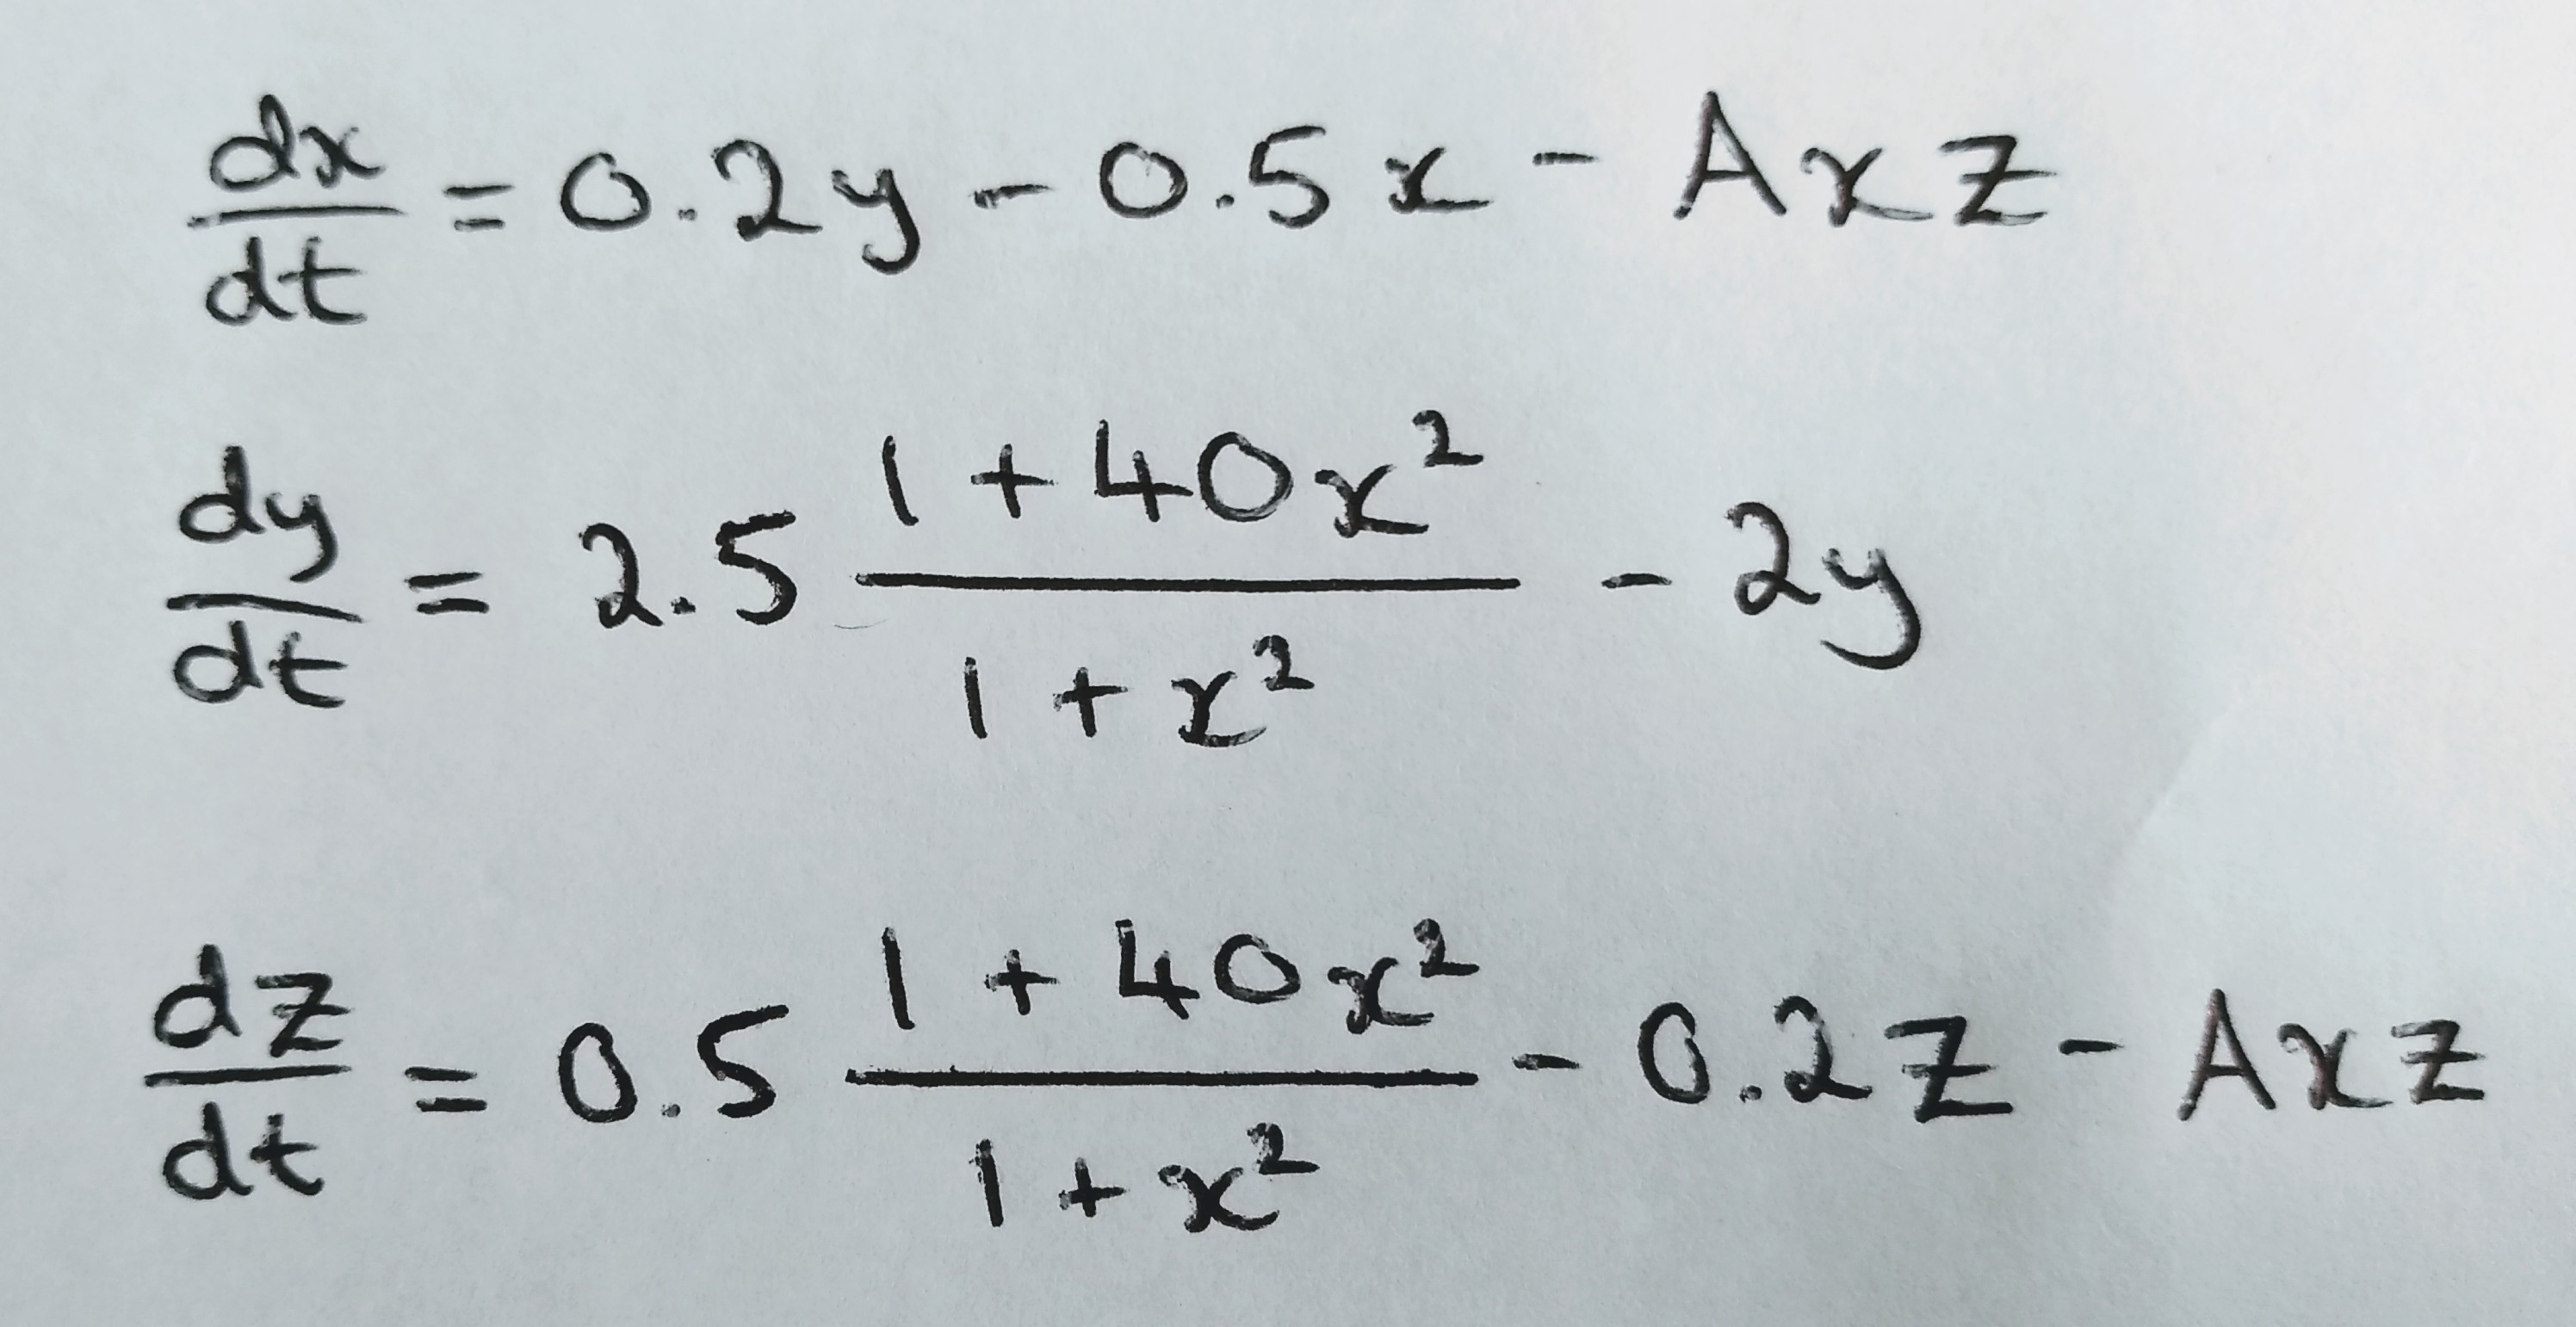

Here, the variables $x$, $y$ and $z$ represent the concentrations of protein, messenger RNA and small-noncoding RNA, respectively, while $t$ represents time. The parameter $A$ represents the association rate of the small-noncoding RNA and protein. All the variables must be non-negative numbers. Numerous processes are included in this model, which you can read about in the above article, if you are interested.

Your task is to use Euler's method to produce your own cellular oscillations. When doing so, you must address the points below:

- First of all, rewrite the above model using LaTeX (those handwritten equations do not look very professional).
- In your implementation of Euler's method, use numpy arrays instead of lists.
- Use the parameter value $A=0.4$. 
- Experiment yourself to choose appropriate initial conditions and an appropriate time interval for your simulations.
- Discuss your choice of step size for time $t$.

Once you have implemented Euler's method, address the following points:

- Plot the variables $(x,y,z)$ in a single figure with time $t$ on the $x$-axis.
- Plot the output from the simulation in the $(x,y)$-plane and the $(y,z)$-plane. What do you observe?
- What happens to the oscillations when you increase the value of parameter $A$ to $0.6$? Comment and show a plot.

# Oscillations in gene regulation - Cell Dynamics

### Concentrations of Protein (x), mRNA (y) and microRNA (z)

Simplified model for cell dynamics:

\begin{align} 
\frac{dx}{dt} &= 0.2y -0.5x -Axz \\
\frac{dy}{dt} &= 2.5 \left( \frac{1+40x^2}{1+x^2} \right) -2y \\
\frac{dz}{dt} &= 0.5 \left( \frac{1+40x^2}{1+x^2} \right) -0.2z -Axz 
\end{align} 

Apply Euler's method using NumPy arrays to produce cellular oscillations.

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def euler(h,a,b,x0,y0,z0,AR): 
    # h is the size of the steps you are taking
    # a is the starting time point
    # b is the ending time point
    # x0 is the starting position for x(protein)
    # y0 is the starting position for y(mRNA)
    # z0 is the starting position for z(microRNA)
    # AR is association rate
    
    # end time - start time / step size ... used for specifiying the specific range invovled
    N = int((b-a)/h)
    
    # set up mesh points
    t = np.linspace(a,b, N+1) 
    x = np.zeros((N+1)) 
    y = np.zeros((N+1)) 
    z = np.zeros((N+1))
    
    # set up initial values
    x[0], y[0], z[0] = (x0, y0, z0)
    
    # integrate for each model
    for i in range(N): 
        x[i+1] = x[i] + h * ((0.2*y[i])-(0.5*x[i])-(AR*x[i]*z[i]))
        y[i+1] = y[i] + h * (2.5*((1+(40*(x[i]**2)))/1+x[i]**2)-2*y[i])
        z[i+1] = z[i] + h * (0.5*((1+(40*(x[i]**2)))/1+x[i]**2)-0.2*z[i]-AR*x[i]*z[i])
        
    return (t,x,y,z)

In [150]:
(time, protein, mRNA, microRNA) = euler(0.001,0,100,1,1,1,0.4)

# small non-coding RNAs ~ microRNAs (miRNAs)

# Discuss your choice of step size for time t:

# when a = 0, b = 100
# a step size of 0.001 means an approximation is made for 100,000 particular time points for X, Y and Z 
# this smaller step size allows the approximated value of these points to be estimated with greater accuracy
# a smaller step size means the resulting approximated curve will be much closer to the true solution curve that one is trying to estimate using Euler method
# the more points of approximation, the less error involved

# if the step size is too big, too many points for X,Y and Z will not be approximated at all 
# and the points that are approximated at step size h will be inaccurate and erroneous
# a big step size will mean the resulting approximated curve will be further away from the true solution curve that one is trying to estimate using Euler method
# the less points of approximation, the more error involved

# through experimentation, a step size of <= 0.01 appears most suitable here for estimating X,Y,Z
# 0.001 makes approximations for 100,000 time points (this option was selected)
# 0.0001 will make 1,000,000 approximations (takes a small bit longer to run)

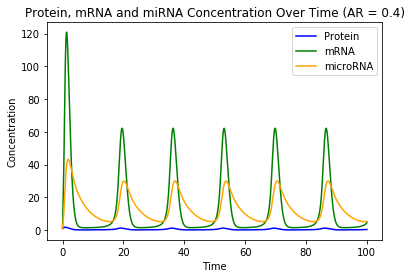

In [151]:
## PLOTTING ##
# plot x, y, z with t on x axis
fig, ax = plt.subplots()
ax.plot(time, protein, 'blue', label='Protein')
ax.plot(time, mRNA, 'green', label='mRNA')
ax.plot(time, microRNA, 'orange', label='microRNA')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.set_title('Protein, mRNA and miRNA Concentration Over Time (AR = 0.4)')
ax.legend()

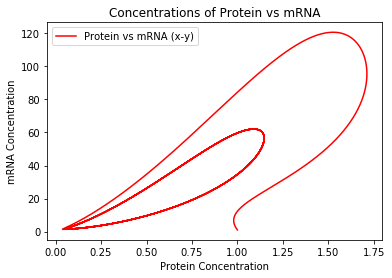

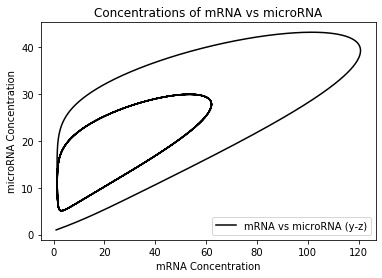

In [143]:
# Plot the output from the simulation in the (x,y)-plane and the (y,z)-plane. What do you observe?
x_y_plot = plt.plot(protein, mRNA,'red',label="Protein vs mRNA (x-y)")
plt.legend(loc = "upper left")
plt.xlabel('Protein Concentration')
plt.ylabel('mRNA Concentration')
plt.title('Concentrations of Protein vs mRNA')
plt.show(x_y_plot)

y_z_plot = plt.plot(mRNA, microRNA, 'black',label="mRNA vs microRNA (y-z)")
plt.legend(loc = "lower right")
plt.xlabel('mRNA Concentration')
plt.ylabel('microRNA Concentration')
plt.title('Concentrations of mRNA vs microRNA')
plt.show(y_z_plot)


In [ ]:
## OBSERVATIONS ##

# X,Y Plane
# For the initial oscillation for the concentration of protein, it appears to be expressed at very low levels (~1.7 units).
# For the initial oscillation for the concentration of mRNA, it appears to be expressed at much higher levels (~120 units).
# However, for all subsequent oscillations, both mRNA and protein expression are reduced and remain in a constant repeated state of oscillations.
# This can be observed by examining the thickness of the line for the inner loop on the plot.
# The thickness of the line here means for each oscillation, the same expression levels are being reached for both protein and mRNA.
# Follwoing the initial oscillation, the concentration of protein ranges from just above 0 to a maximum of ~1.13 units for each subsequent oscillation.
# Follwoing the initial oscillation, the concentration of mRNA ranges from just above 0 to a maximum of ~60 units for each subsequent oscillation.

# Y,Z Plane
# For the initial oscillation for the concentration of microRNA, it appears to be expressed at moderate levels (~40 units).
# For the initial oscillation for the concentration of mRNA, it appears to be expressed at much higher levels (~120 units).
# However, for all subsequent oscillations, both mRNA and microRNA expression are reduced and remain in a constant repeated state of oscillation.
# This can be observed by examining the thickness of the line for the inner loop on the plot.
# The thickness of the line here means for each oscillation, the same expression levels are being reached for both mRNA and microRNA.
# Follwoing the initial oscillation, the concentration of mRNA ranges from just above 0 to a maximum of ~60 units for each subsequent oscillation.
# Follwoing the initial oscillation, the concentration of microRNA ranges from ~ 6 units to a maximum of ~ 28 units for each subsequent oscillation.

# microRNAs
# MiRNAs are known to interact with the process of RNA translation (mRNA -> protein production):
# They can speed up the process of mRNA degradation, therefore acting as translation repressors.
# [from - "Dynamics of a miRNA model with two delays" (Svetoslav et al. 2012 - DOI: 10.5504/bbeq.2012.0067)]

# This effect can be observed in the plots above as well as the previous plot with X,Y,Z all plotted together.
# In the mRNA vs microRNA plot (y,z) above, one can see that initially there was a large concentration of mRNA present,
# but there was also a larger concentration of microRNAs present.
# Following the initial oscillation, the mRNA levels decrease due to this higher concentration of microRNA
# which acts by accelarating the mRNA degradation process.
# This in turn affects the oscillations of protein concentration, causing the protein concentration to remain in a constant supressed state (x,z).

# This is seen very clearly in the previous X,Y,Z plot


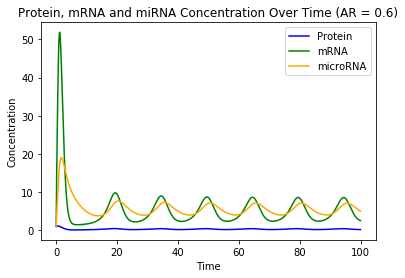

In [149]:
# What happens to the oscillations when you increase the value of parameter A to 0.6? Comment and show a plot.

## PLOTTING ##

# same function as before but different AR specified
(time, protein, mRNA, microRNA) = euler(0.01,0,100,1,1,1,0.6)

# same plotting as before
fig, ax = plt.subplots()
ax.plot(time, protein, 'blue', label='Protein')
ax.plot(time, mRNA, 'green', label='mRNA')
ax.plot(time, microRNA, 'orange', label='microRNA')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.set_title('Protein, mRNA and miRNA Concentration Over Time (AR = 0.6)')
ax.legend()

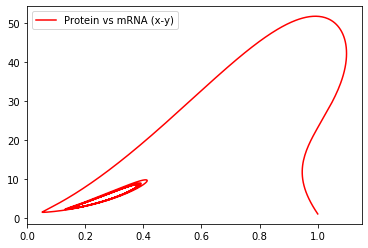

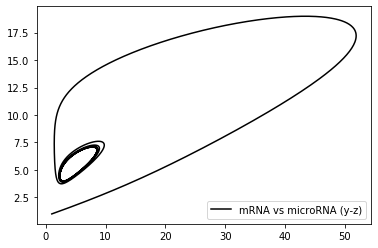

In [89]:
x_y_plot = plt.plot(protein, mRNA,'red',label="Protein vs mRNA (x-y)")
plt.legend()
plt.show(x_y_plot)

y_z_plot = plt.plot(mRNA, microRNA, 'black',label="mRNA vs microRNA (y-z)")
plt.legend(loc = "lower right")
plt.show(y_z_plot)

In [ ]:
## COMMENT ##

# The association rate (AR) for microRNAs is the rate at which the microRNA compelxes are being formed/produced(https://www.sprpages.nl/kinetics/association).
# Therefore if the AR is being increased from 0.4 to 0.6, the concentration of of microRNA will increase.
# The higher the level of microRNA expression, the more mRNA degradation occurs, therefore reducing mRNA concentration further.
# As with the previous examples, following the initial oscillation, the mRNA concentration has reduced and remains in a constant repeated state of oscillation. 
# If the mRNA concentration has been reduced and translation is being supressed further, the protein concentration is also decreased further.
# When the AR value = 0.6, protein concentration is therefore very low, and remains in a further supressed state of constant oscillation.
# This again can be seen by comapring the two different set of plots (where AR = 0.4 and AR = 0.6).

